<a href="https://colab.research.google.com/github/adolfoguimaraes/inteligenciaartificial/blob/main/code/07_AlgoritmoGenetico_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos Genéticos

Para construir nossos programas sobre Algoritmos Genéticos vamos utilizar o framework em python `deap`: https://deap.readthedocs.io/en/master/. Ele não possui apenas Algoritmos Genéticos. O Deap é um framework para computação evolutiva. No nosso estudo, vamos trabalhar apenas com as classes para construção do algoritmo genético. 

In [ ]:
# imports necessários 

from deap import creator, base, tools
import random
import matplotlib.pyplot as plt 
import numpy 

## O problema OneMax

Como visto em sala de aula, o problema do OneMax consiste em criar um vetor de tamanho `n` que maximize o número de 1's no vetor. A solução ótima desse problema é ter um vetor de tamanho `n` com n 1's. Vamos usar esse problema apenas para aprendermos a usar a biblioteca. Os próximos notebooks vão trazer problemas mais complexos. 


**O que precisamos definir para o problema?**

* O formato do indivíduo.
* A fitness e como vamos calcula-la. 

Para esse exemplo é simples. Os indivíduos são formados por vetores que possuem 0's ou 1's. Já a fitness consiste na some dos elementos do vetor. Quanto maior o valor, melhor é aquele indivíduo.

Na biblioteca vamos usar o módulo `creator` para definir os objetots para a Fitness e os indivíduos. 

In [ ]:
# Cria um objeto FitnessMax que baseado em base.Fitness com peso 1 para fitness
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Cria um objeto Individual do tipo list que é avaliado a partir do FitnessMax definido anteriormente
creator.create("Individual", list, fitness=creator.FitnessMax)

Em seguida vamos usar a classe `base.Toolbox` para definir algumas funções que serão utilizadas na execução do algoritmo genético. A Toolbox é usada como um contêiner para funções (ou operadores) e nos permite criar novos operadores criando aliases e personalizando funções existentes.

In [ ]:
# Instanciando a Toolbox
toolbox = base.Toolbox()

In [ ]:
# Definindo o conjunto de operações 
toolbox.register("select", tools.selTournament, tournsize=3) # Seleção por torneio
toolbox.register("mate", tools.cxTwoPoint) # Crossover em dois pontos
toolbox.register("mutate", tools.mutFlipBit, indpb=0.02) # Mutação com probabilidade de 2%

Vamos usar a mesma idéia para definir como a nossa Fitness vai ser calculada.

In [ ]:
# Função que calcula a Fitness dado um individual. Lembre que o indvíduo foi definido como uma lista

def oneMaxFitness(individual):
    return sum(individual)

In [ ]:
# Agora vamos registrar essa função como o método para cálculo da Fitness
toolbox.register("evaluate", oneMaxFitness)

Com a `Toolbox` é possível definir como os indivíduos vão ser criados. 

In [ ]:
# Definindo o método de criaçã dos indivíduos

# Criando  a função zeroOrOne que escolhe um inteiro aleatório que pode ser 1 ou 0
toolbox.register("zeroOrOne", random.randint, 0, 1) 

Vamos testar como podemos usar essa função para gerar indivíduos. O código a seguir utiliza a função `tools.initRepeat` que chama a função `zeroOrOne` 30 vezes para definir um elemento da lista. Por exemplo, a chamada: 

`randomList = tools.initRepeat(list, toolbox.zeroOrOne, 30)`

vai gerar uma lista de tamanho 30 com 0's ou 1's que forma gerados aleatoriamente usando a função definida em `zeroOrOne` que foi `random.randint`. 

Vamos testar!!!

In [ ]:
randomList = tools.initRepeat(list, toolbox.zeroOrOne, 30)
print(randomList)

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]


Vamos usar a mesma abordagem para criar outros componentes do nosso algoritmo genético. Falta definir dois pontos importantes do nosso algoritmo: a função para criar N indivíduos e outra para criar a população com esses N indivíduos. 

Essa criação é feita durante a execução do algoritmo, mas vamos registrar funções que façam esse trabalho.

In [ ]:
# Cria a função individualCreator que utiliza o initRepear para criar um indivíduo de tamanho 30
# Observe que ela faz a mesma coisa que o código anterior.
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, 30)

Vamos testar!!! 

In [ ]:
print(toolbox.individualCreator())

[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]


Agora a função que cria a população de indivíduos definina em `individualCreator`.

In [ ]:
# Cria uma população de tamanho N com os indivíduos. O valor de N vai ser passado como parâmetro.
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

Vamos testar!!!

In [ ]:
print(toolbox.populationCreator(3))

[[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]]


Veja que foi criado uma lista com 3 listas de 0's e 1's criadas de acordo com a definição de `invidualCreator`.

Por enquanto esses são os principais conceitos da biblioteca para que a gente possa criar nosso algoritmo genético para o problema do `OneMax`. Perceba que essa forma de criar funções, indivíduos, população permite definir funções que seja apropriadas ao problema que estamos trabalhando. Lembre que a criação de indivíduos e a definição da fitness são diretamente relacionadas ao problema que estamos trabalhando. 

Vamos para a próxima seção trabalhar com o problea do OneMax completo. 

## Construindo o Algoritmo Genético

O primeiro passo para a criação do nosso algoritmo é definir alguns parâmetros, como por exemplo o tamanho dos indivíduos, o tamanho da população dentre outros. O conjunto de variáveis a seguir define esses parâmetros. 

In [ ]:

ONE_MAX_LENGTH = 100 # Tamanho do indivíduo
POPULATION_SIZE = 200 # Tamanho da População 

P_CROSSOVER = 0.9 # Probabilidade de Crossover 
P_MUTATION = 0.1 # Probabilidade de Mutação

MAX_GENERATIONS = 50 # Critério de parada (50 gerações)

# Seed do Random
RANDOM_SEED = 42 
random.seed(RANDOM_SEED)



In [ ]:
# Definindo os objetos da fitness e dos indivíduos
creator.create("FitnessMinMax", base.Fitness, weights=(1.0,))
creator.create("IndividualMinMax", list, fitness=creator.FitnessMinMax)

In [ ]:
# Definindo as Operações 
toolboxMinMax = base.Toolbox()
toolboxMinMax.register("zeroOrOne", random.randint, 0, 1)
toolboxMinMax.register("select", tools.selTournament, tournsize=3)
toolboxMinMax.register("mate", tools.cxOnePoint)
toolboxMinMax.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [ ]:
def oneMinMaxFitness(individual):
  return sum(individual)


In [ ]:
# Definindo o método de avaliação
toolboxMinMax.register("evaluate", oneMinMaxFitness)

In [ ]:
# Definindo os métodos de criação de indivíduos e população
toolboxMinMax.register("individualCreator", 
    tools.initRepeat, 
    creator.IndividualMinMax, 
    toolboxMinMax.zeroOrOne, 
    ONE_MAX_LENGTH)

In [ ]:
toolboxMinMax.register("populationCreator",
    tools.initRepeat,
    list,
    toolbox.individualCreator)

## Algoritmo Genético

Até aqui apenas inicializamos os principais componentes do algoritmo genético. A seguir, vamos construir o loop de execução do algoritmo utilizando as funções definidas anteriormente. 

O primeiro passo é criar a população inicial e avalia-la. 

In [ ]:
# Cria a população inicial
population = toolboxMinMax.populationCreator(n=POPULATION_SIZE)

# Calcula a fitness para cada indivíduo
fitnessValues = list(map(toolbox.evaluate, population))

In [ ]:
# Atribui a cada indivíduo o valor calculado
for individual, fitnessValue in zip(population, fitnessValues):
  individual.fitness.values = (fitnessValue,)

Uma vez que a população inicial foi criada e avaliada, vamos executar o loop do algoritmo genético. 

In [ ]:

# Inicialização das variáveis
maxFitnessValues = []
meanFitnessValues = []
generationCounter = 0 


while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
  
  generationCounter += 1

  # Seleciona os indivíduos de acordo com o critério seleção
  offspring = toolbox.select(population, len(population))
  offspring = list(map(toolbox.clone, offspring))

  # Aplica o crossover
  for child1, child2 in zip(offspring[::2], offspring[1::2]):
    if random.random() < P_CROSSOVER:
      toolbox.mate(child1, child2)
      del child1.fitness.values
      del child2.fitness.values

  # Aplica a mutação
  for mutant in offspring:
    if random.random() < P_MUTATION:
      toolbox.mutate(mutant)
      del mutant.fitness.values
  
  # Recalcula a fitness dos novos indivíduos criados
  freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
  freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
  for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
    individual.fitness.values = (fitnessValue, )


  # Substitui a antiga população pela nova.
  population[:] = offspring

  # Atualiza o vetor de fitness
  fitnessValues = [ind.fitness.values[0] for ind in population]

  # Calcula o Max e a Média para adicionar ao vertor
  maxFitness = max(fitnessValues)
  meanFitness = sum(fitnessValues) / len(population)

  maxFitnessValues.append(maxFitness)
  meanFitnessValues.append(meanFitness)

  print("- Generation {}: Max Fitness = {}, Avg Fitness = {}"
      .format(generationCounter, maxFitness, meanFitness))

Vamos plotar um gráfico para analisar como se comportou a evolução do nosso algoritmo.

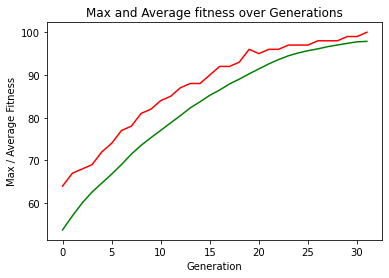

In [ ]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()
